<a href="https://colab.research.google.com/github/Siri-Vaishnavi-2005/DV-Lab-Tasks/blob/main/DV_Task_4%2C5%2C6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

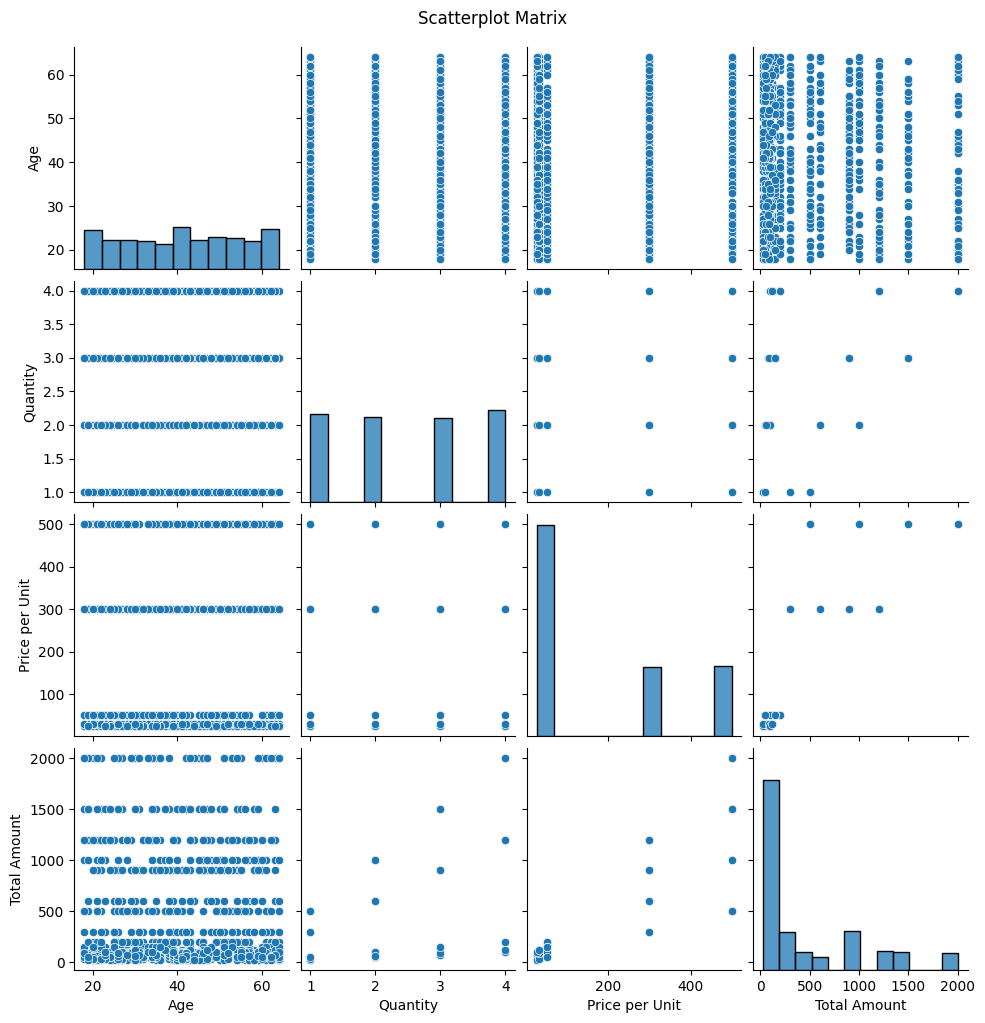

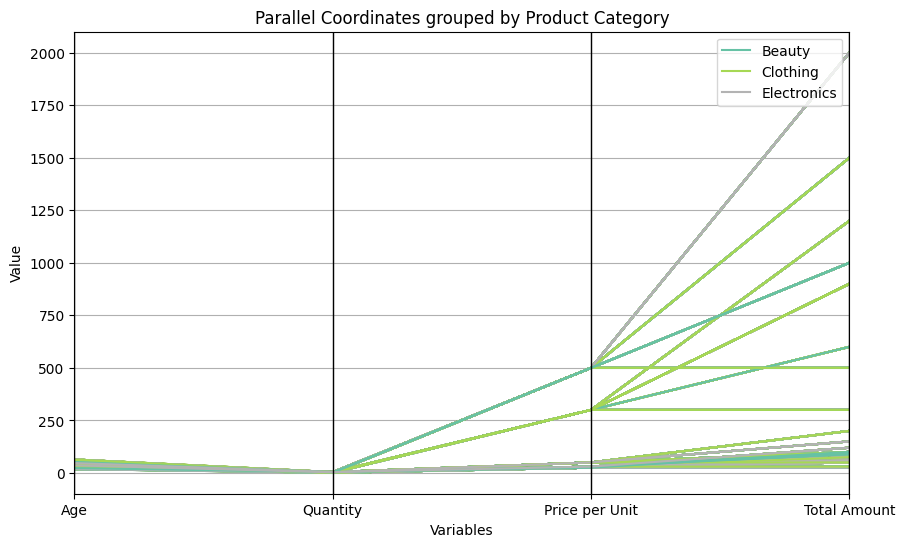

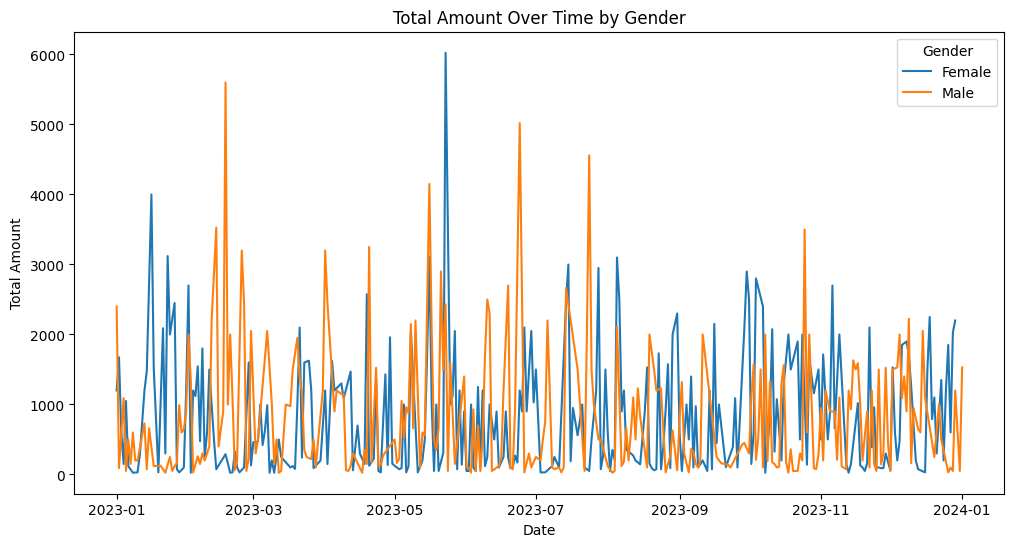

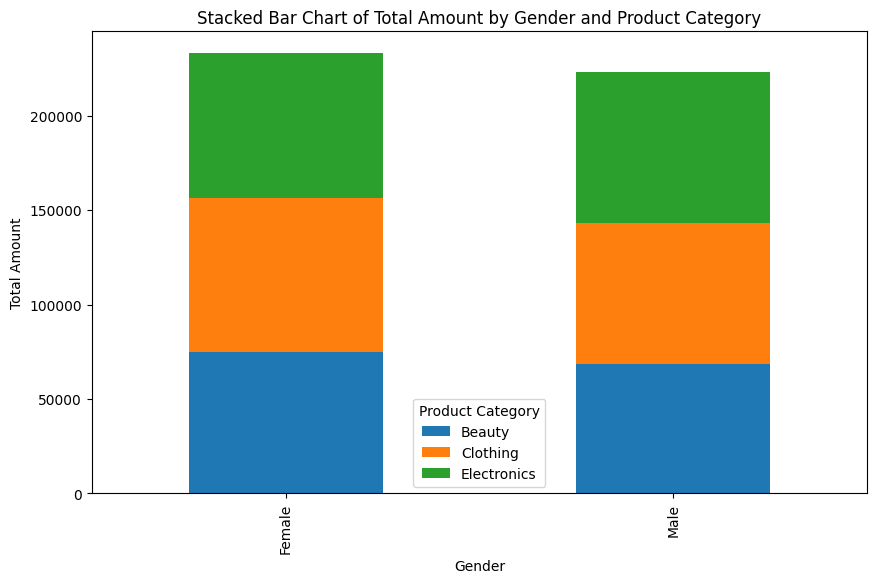

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

# Load data
filename = 'retail_sales_dataset.csv'  # <-- change this to your CSV filename
df = pd.read_csv(filename)

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Numeric variables for multivariate analysis
num_vars = ['Age', 'Quantity', 'Price per Unit', 'Total Amount']
num_vars = [col for col in num_vars if col in df.columns]

# --- Scatterplot Matrix ---
sns.pairplot(df[num_vars])
plt.suptitle('Scatterplot Matrix', y=1.02)
plt.show()

# --- Parallel Coordinates Plot grouped by Product Category ---
if 'Product Category' in df.columns:
    plt.figure(figsize=(10,6))
    parallel_coordinates(df[['Product Category'] + num_vars], 'Product Category', colormap='Set2')
    plt.title('Parallel Coordinates grouped by Product Category')
    plt.xlabel('Variables')
    plt.ylabel('Value')
    plt.show()

# --- Line Graph: Total Amount over time by Gender ---
if {'Date', 'Total Amount', 'Gender'}.issubset(df.columns):
    sales_time = df.groupby(['Date', 'Gender'])['Total Amount'].sum().reset_index()
    plt.figure(figsize=(12,6))
    sns.lineplot(data=sales_time, x='Date', y='Total Amount', hue='Gender')
    plt.title('Total Amount Over Time by Gender')
    plt.xlabel('Date')
    plt.ylabel('Total Amount')
    plt.legend(title='Gender')
    plt.show()

# --- Stacked Bar Chart: Total Amount by Gender and Product Category ---
if {'Gender', 'Product Category', 'Total Amount'}.issubset(df.columns):
    amount_gender_cat = df.groupby(['Gender', 'Product Category'])['Total Amount'].sum().unstack()
    amount_gender_cat.plot(kind='bar', stacked=True, figsize=(10,6))
    plt.title('Stacked Bar Chart of Total Amount by Gender and Product Category')
    plt.xlabel('Gender')
    plt.ylabel('Total Amount')
    plt.legend(title='Product Category')
    plt.show()

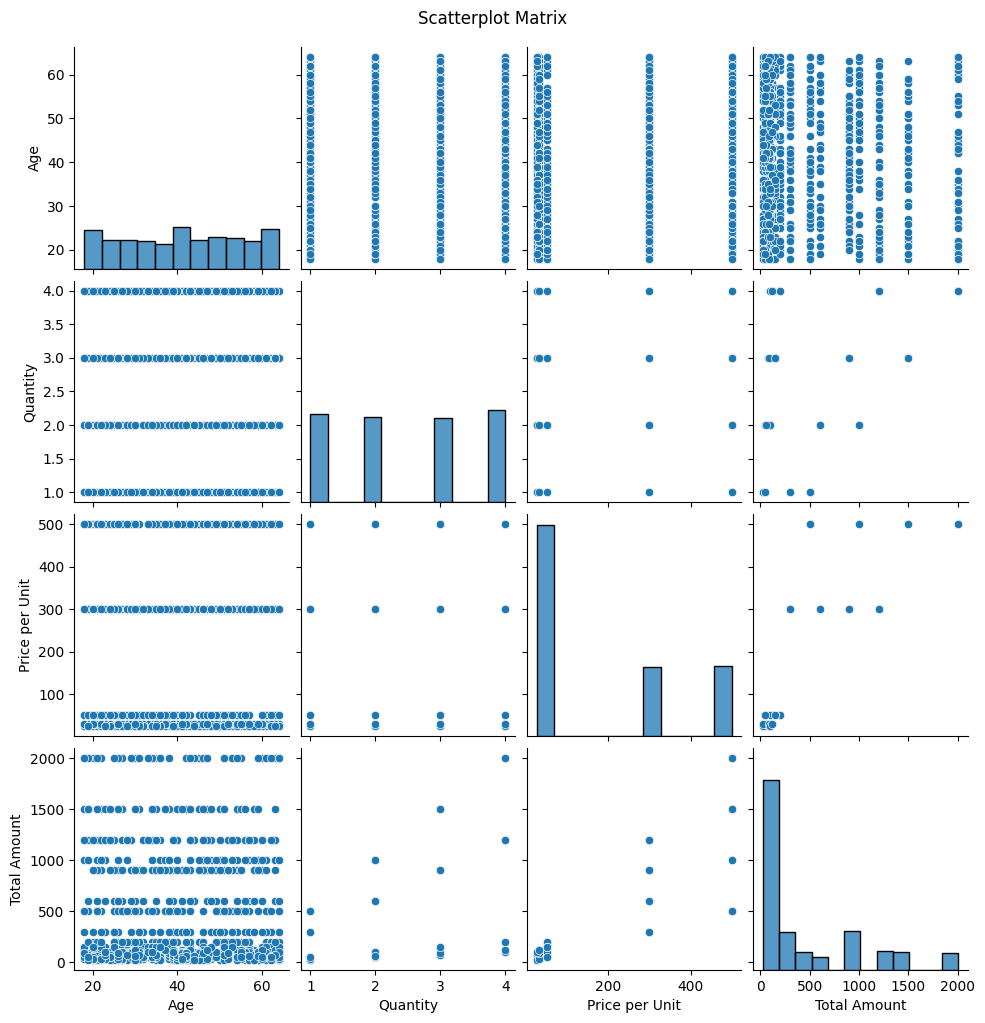

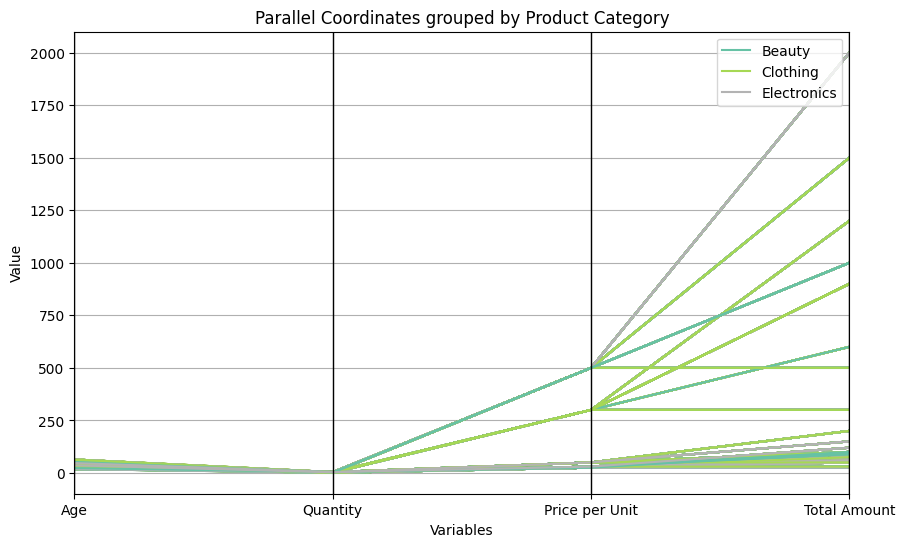

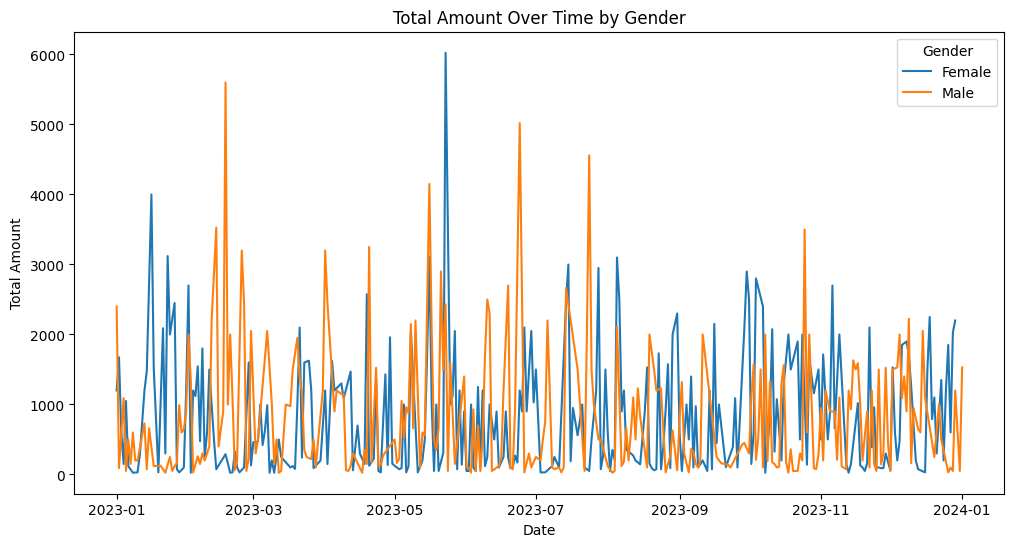

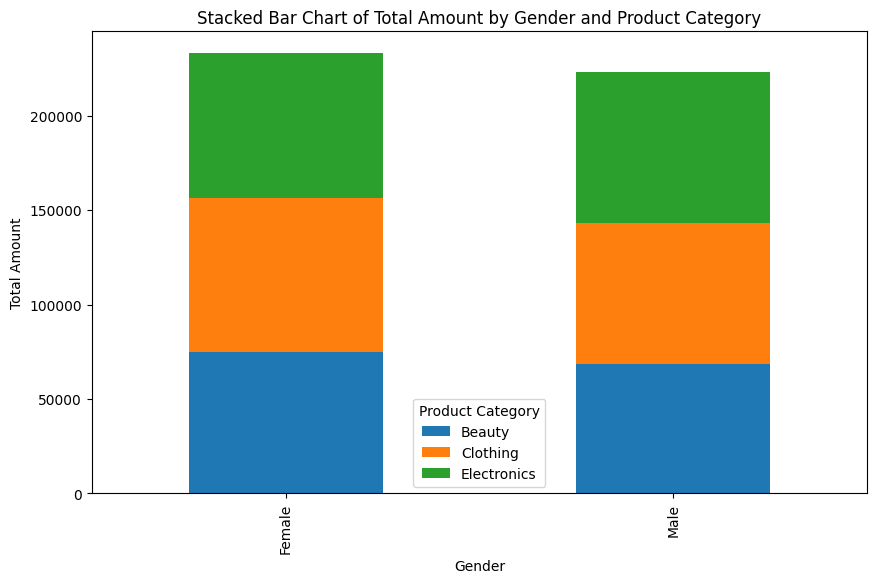

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

# Load data
filename = 'retail_sales_dataset.csv'  # <-- change this to your CSV filename
df = pd.read_csv(filename)

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Numeric variables for multivariate analysis
num_vars = ['Age', 'Quantity', 'Price per Unit', 'Total Amount']
num_vars = [col for col in num_vars if col in df.columns]

# --- Scatterplot Matrix ---
sns.pairplot(df[num_vars])
plt.suptitle('Scatterplot Matrix', y=1.02)
plt.show()

# --- Parallel Coordinates Plot grouped by Product Category ---
if 'Product Category' in df.columns:
    plt.figure(figsize=(10,6))
    parallel_coordinates(df[['Product Category'] + num_vars], 'Product Category', colormap='Set2')
    plt.title('Parallel Coordinates grouped by Product Category')
    plt.xlabel('Variables')
    plt.ylabel('Value')
    plt.show()

# --- Line Graph: Total Amount over time by Gender ---
if {'Date', 'Total Amount', 'Gender'}.issubset(df.columns):
    sales_time = df.groupby(['Date', 'Gender'])['Total Amount'].sum().reset_index()
    plt.figure(figsize=(12,6))
    sns.lineplot(data=sales_time, x='Date', y='Total Amount', hue='Gender')
    plt.title('Total Amount Over Time by Gender')
    plt.xlabel('Date')
    plt.ylabel('Total Amount')
    plt.legend(title='Gender')
    plt.show()

# --- Stacked Bar Chart: Total Amount by Gender and Product Category ---
if {'Gender', 'Product Category', 'Total Amount'}.issubset(df.columns):
    amount_gender_cat = df.groupby(['Gender', 'Product Category'])['Total Amount'].sum().unstack()
    amount_gender_cat.plot(kind='bar', stacked=True, figsize=(10,6))
    plt.title('Stacked Bar Chart of Total Amount by Gender and Product Category')
    plt.xlabel('Gender')
    plt.ylabel('Total Amount')
    plt.legend(title='Product Category')
    plt.show()


task5
a

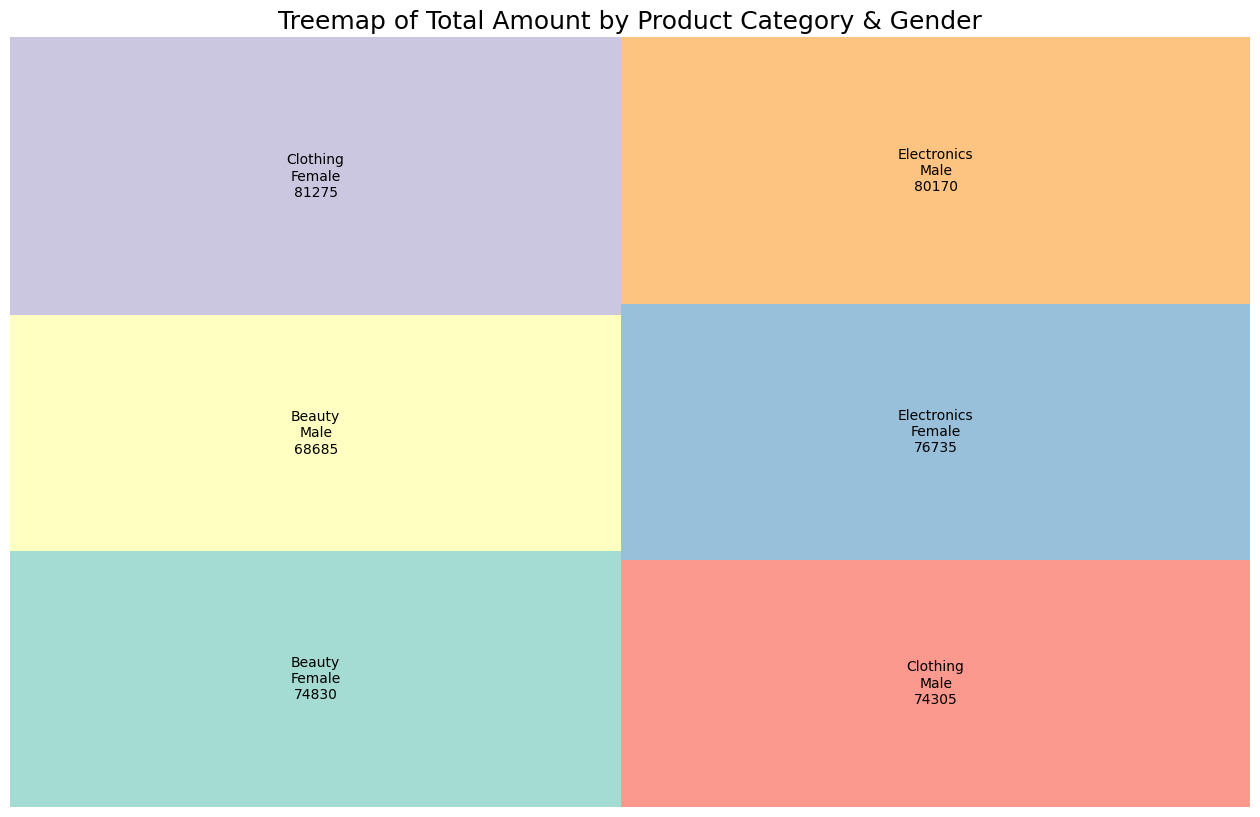

In [ ]:
# ==========================
# Treemap for Retail Sales Dataset
# ==========================
import pandas as pd
import matplotlib.pyplot as plt
!pip install squarify
import squarify
import seaborn as sns

# 1. Read dataset
file_name = 'retail_sales_dataset.csv'
df = pd.read_csv(file_name)

# 2. Aggregate data by Product Category & Gender
agg_data = df.groupby(['Product Category', 'Gender'])['Total Amount'].sum().reset_index()

# 3. Create labels
agg_data['label'] = (
    agg_data['Product Category'] + "\n" +
    agg_data['Gender'] + "\n" +
    agg_data['Total Amount'].round(0).astype(str)
)

# 4. Plot Treemap
plt.figure(figsize=(16,10))
squarify.plot(
    sizes=agg_data['Total Amount'],
    label=agg_data['label'],
    color=sns.color_palette("Set3", len(agg_data)),
    alpha=0.8
)
plt.axis("off")
plt.title("Treemap of Total Amount by Product Category & Gender", fontsize=18)
plt.show()


Task 5B


In [ ]:
# ==========================
# Sunburst Chart for Retail Sales Dataset
# ==========================
import pandas as pd
import plotly.express as px

# 1. Read dataset
file_name = "retail_sales_dataset.csv"
df = pd.read_csv(file_name)

# 2. Create Age Groups
bins = [0, 25, 40, 60, 100]
labels = ["Youth (<25)", "Young Adult (25-40)", "Middle Age (40-60)", "Senior (60+)"]
df["Age Group"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)

# 3. Aggregate data
agg_data = df.groupby(['Product Category', 'Gender', 'Age Group'])['Total Amount'].sum().reset_index()

# 4. Sunburst Plot
fig = px.sunburst(
    agg_data,
    path=['Product Category', 'Gender', 'Age Group'],  # hierarchy levels
    values='Total Amount',
    color='Product Category',   # color by product category
    color_discrete_sequence=px.colors.qualitative.Set3,
    title="Sunburst Chart of Total Amount by Category, Gender & Age Group"
)

fig.show()


/tmp/ipython-input-3215742496.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_data = df.groupby(['Product Category', 'Gender', 'Age Group'])['Total Amount'].sum().reset_index()
/usr/local/lib/python3.12/dist-packages/plotly/express/_core.py:1727: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfg = df.groupby(path[i:]).agg(agg_f)


Task 6

/tmp/ipython-input-625888056.py:32: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipython-input-625888056.py:32: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipython-input-625888056.py:32: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



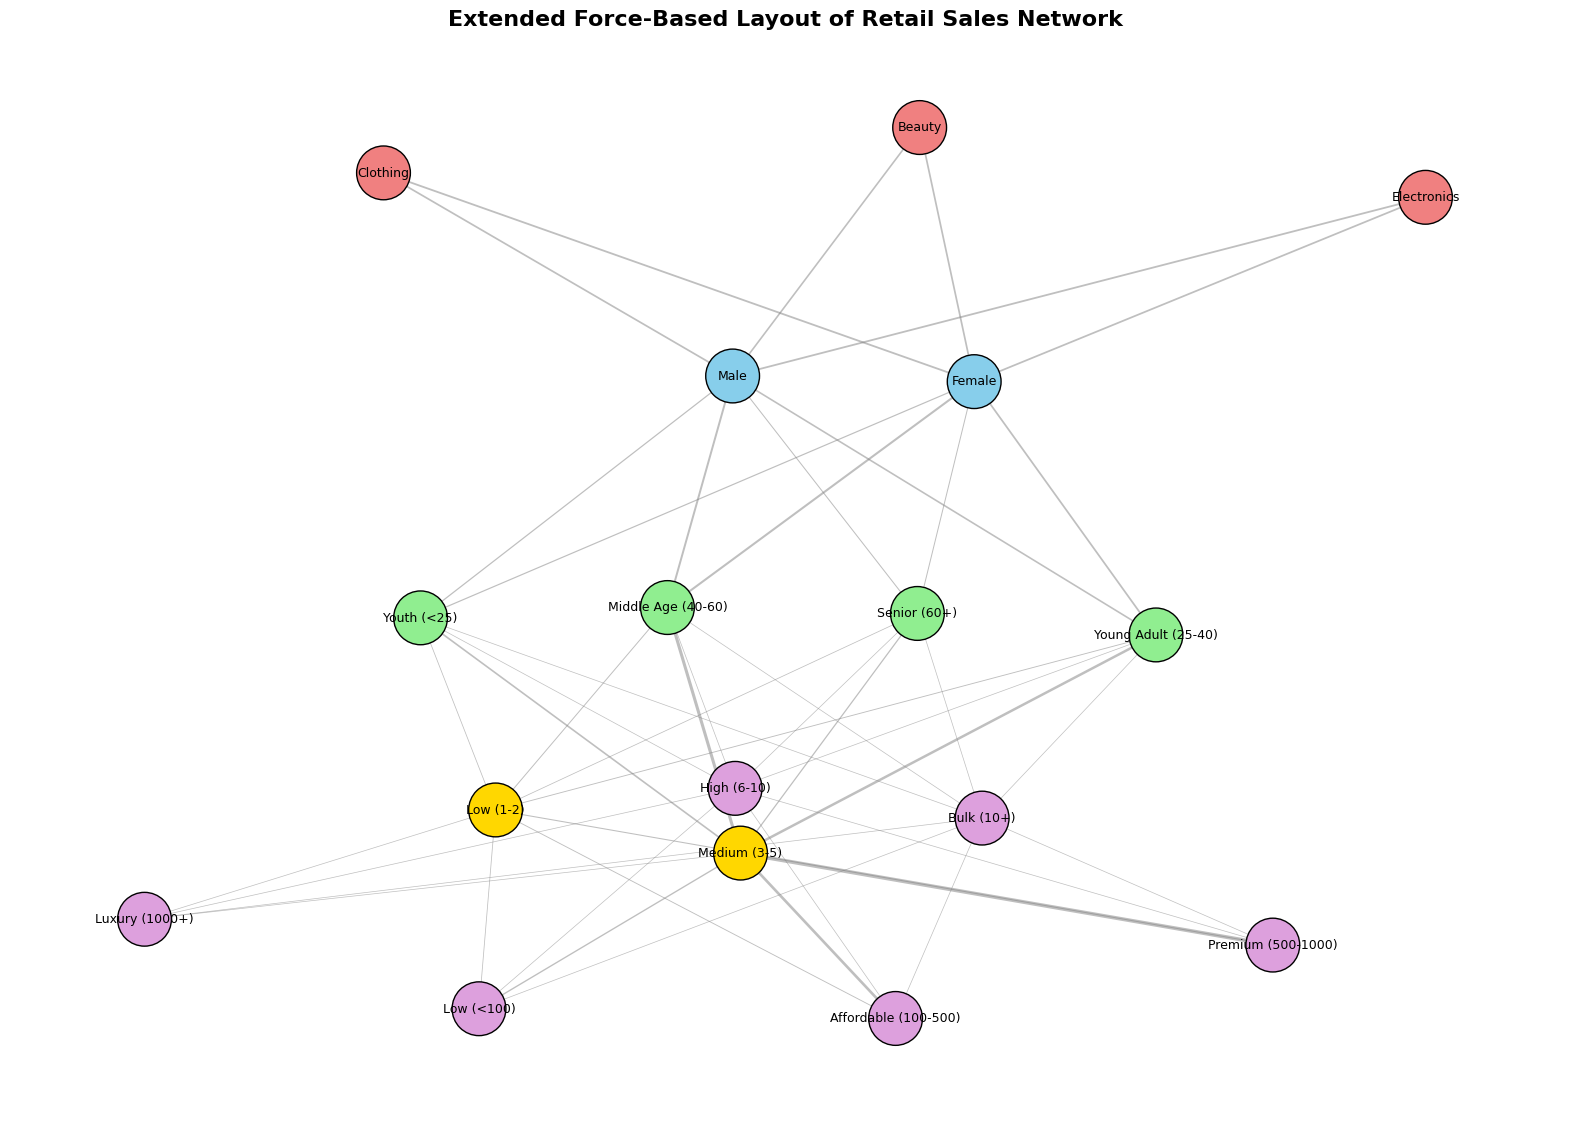

In [ ]:
# ==========================
# Extended Force-Based Network with More Variables
# ==========================
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load dataset
file_path = "retail_sales_dataset.csv"
df = pd.read_csv(file_path)

# Create Age Groups
bins_age = [0, 25, 40, 60, 100]
labels_age = ["Youth (<25)", "Young Adult (25-40)", "Middle Age (40-60)", "Senior (60+)"]
df["Age Group"] = pd.cut(df["Age"], bins=bins_age, labels=labels_age, right=False)

# Create Quantity Groups
bins_qty = [0, 2, 5, 10, 50]
labels_qty = ["Low (1-2)", "Medium (3-5)", "High (6-10)", "Bulk (10+)"]
df["Quantity Group"] = pd.cut(df["Quantity"], bins=bins_qty, labels=labels_qty, right=False)

# Create Price Ranges
bins_price = [0, 100, 500, 1000, 5000]
labels_price = ["Low (<100)", "Affordable (100-500)", "Premium (500-1000)", "Luxury (1000+)"]
df["Price Range"] = pd.cut(df["Price per Unit"], bins=bins_price, labels=labels_price, right=False)

# Build graph
G = nx.Graph()

# Add edges step by step
def add_edges(group_cols):
    agg = df.groupby(group_cols)['Total Amount'].sum().reset_index()
    for _, row in agg.iterrows():
        G.add_edge(row[group_cols[0]], row[group_cols[1]], weight=row['Total Amount'])

# Product Category → Gender
add_edges(['Product Category', 'Gender'])
# Gender → Age Group
add_edges(['Gender', 'Age Group'])
# Age Group → Quantity Group
add_edges(['Age Group', 'Quantity Group'])
# Quantity Group → Price Range
add_edges(['Quantity Group', 'Price Range'])

# Layout
pos = nx.spring_layout(G, k=2.5, iterations=250, seed=42, weight=None)

# Node Colors by variable type
node_colors = []
for node in G.nodes():
    if node in df['Product Category'].unique():
        node_colors.append("lightcoral")   # Product Category
    elif node in df['Gender'].unique():
        node_colors.append("skyblue")      # Gender
    elif node in df['Age Group'].unique():
        node_colors.append("lightgreen")   # Age Group
    elif node in df['Quantity Group'].unique():
        node_colors.append("gold")         # Quantity Group
    else:
        node_colors.append("plum")         # Price Range

# Draw Graph
plt.figure(figsize=(20, 14))
nx.draw_networkx_nodes(G, pos, node_size=1500, node_color=node_colors, edgecolors="black")
edges = G.edges(data=True)
nx.draw_networkx_edges(G, pos, edgelist=edges,
                       width=[0.5 + d['weight']/100000 for (_,_,d) in edges],
                       alpha=0.5, edge_color="gray")
nx.draw_networkx_labels(G, pos, font_size=9, font_color="black")

plt.title("Extended Force-Based Layout of Retail Sales Network", fontsize=16, fontweight="bold")
plt.axis("off")
plt.show()